In [ ]:
from scipy.optimize import curve_fit
import numpy


In [46]:
from utils.epg import *
import icecream as ic
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from copy import copy

In [47]:
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}"     # xcolor for colours
}
matplotlib.rcParams.update(pgf_with_latex)


In [48]:
fname_rec = "~/Dropbox (MIT)/data/MC/dvcsRadRECinb.root"
epg_rec = epgFromROOT(fname_rec, rec = True)
# dvpi0_mc = epg_mc.getDVpi0()
dvcs_rec = epg_rec.getDVCS()

In [49]:
dvcs_mc = epg_rec.df_MC

In [50]:
dvcs_mc = dvcs_mc[dvcs_mc["event"].isin(dvcs_rec["event"])]

In [51]:
dvcs = pd.merge(dvcs_mc, dvcs_rec, how='outer', on='event')

In [52]:
MCele = [dvcs["MCEpx"], dvcs["MCEpy"], dvcs["MCEpz"]]
dvcs["MCEe"] = getEnergy(MCele, me)
dvcs["MCEtheta"] = getTheta(MCele)
dvcs["MCEphi"] = getPhi(MCele)
MCpro = [dvcs["MCPpx"], dvcs["MCPpy"], dvcs["MCPpz"]]
dvcs["MCPe"] = getEnergy(MCpro, M)
dvcs["MCPtheta"] = getTheta(MCpro)
dvcs["MCPphi"] = getPhi(MCpro)
MCgam = [dvcs["MCGpx"], dvcs["MCGpy"], dvcs["MCGpz"]]
dvcs["MCGe"] = getEnergy(MCgam, 0)
dvcs["MCGtheta"] = getTheta(MCgam)
dvcs["MCGphi"] = getPhi(MCgam)

In [53]:
ele = [dvcs["Epx"], dvcs["Epy"], dvcs["Epz"]]
dvcs["Etheta"] = getTheta(ele)
dvcs["Etheta"] = getTheta(ele)
dvcs["Ephi"] = getPhi(ele)
pro = [dvcs["Ppx"], dvcs["Ppy"], dvcs["Ppz"]]
dvcs["Ptheta"] = getTheta(pro)
dvcs["Pphi"] = getPhi(pro)
gam = [dvcs["Gpx"], dvcs["Gpy"], dvcs["Gpz"]]
dvcs["Gtheta"] = getTheta(gam)
dvcs["Gphi"] = getPhi(gam)

In [54]:
dvcs = dvcs[dvcs["MCGe"]-dvcs["Ge"]>-1]

In [55]:
dvcsFD = dvcs[dvcs["Pstat"]<4000]
dvcsCD = dvcs[dvcs["Pstat"]>4000]

In [56]:
dvcsgFD = dvcs[dvcs["Gstat"]>2000]
dvcsgFT = dvcs[dvcs["Gstat"]<2000]

In [57]:
dvcsCDFT = dvcs[(dvcs["Pstat"]>4000) & (dvcs["Gstat"]<2000)]
dvcsCDFD = dvcs[(dvcs["Pstat"]>4000) & (dvcs["Gstat"]>2000)]
dvcsFDFT = dvcs[(dvcs["Pstat"]<4000) & (dvcs["Gstat"]<2000)]
dvcsFDFD = dvcs[(dvcs["Pstat"]<4000) & (dvcs["Gstat"]>2000)]


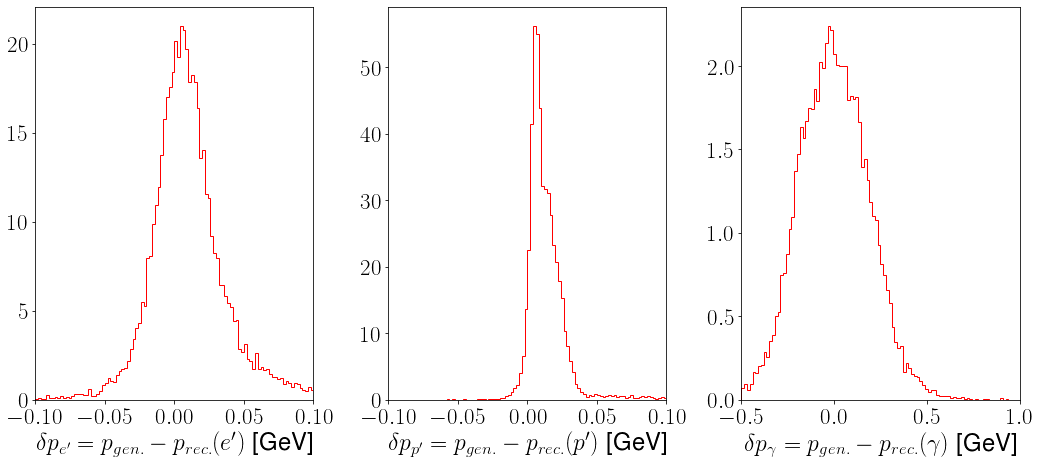

In [67]:
#energy loss
fig, axs = plt.subplots(1,3, figsize=(15, 7))
cmap = copy(plt.cm.get_cmap("jet"))
#gen. - rec.
# axs[0].hist((dvcsCDFD["MCEe"]-dvcsCDFD["Ee"]), bins = np.linspace(-0.1, 0.1, 101), density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
# axs[0].hist((dvcsCDFT["MCEe"]-dvcsCDFT["Ee"]), bins = np.linspace(-0.1, 0.1, 101), density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
axs[0].hist((dvcsFDFD["MCEe"]-dvcsFDFD["Ee"]), bins = np.linspace(-0.1, 0.1, 101), density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
axs[0].set_xlabel(r"$\delta p_{e'}=p_{gen.}-p_{rec.} (e')$"+" [GeV]")
axs[0].set_xlim([-0.1, 0.1])
# axs[1].hist((dvcsCDFD["MCPe"]-dvcsCDFD["Pe"]), bins = np.linspace(-0.1, 0.1, 101), density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
# axs[1].hist((dvcsCDFT["MCPe"]-dvcsCDFT["Pe"]), bins = np.linspace(-0.1, 0.1, 101), density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
axs[1].hist((dvcsFDFD["MCPe"]-dvcsFDFD["Pe"]), bins = np.linspace(-0.1, 0.1, 101), density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
axs[1].set_xlabel(r"$\delta p_{p'}=p_{gen.}-p_{rec.} (p')$"+" [GeV]")
axs[1].set_xlim([-0.1, 0.1])
# axs[2].hist((dvcsCDFD["MCGe"]-dvcsCDFD["Ge"]), bins = np.linspace(-0.5, 1, 101), density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
# axs[2].hist((dvcsCDFT["MCGe"]-dvcsCDFT["Ge"]), bins = np.linspace(-0.5, 1, 101), density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
axs[2].hist((dvcsFDFD["MCGe"]-dvcsFDFD["Ge"]), bins = np.linspace(-0.5, 1, 101), density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
axs[2].set_xlabel(r"$\delta p_{\gamma}=p_{gen.}-p_{rec.} (\gamma)$"+" [GeV]")
axs[2].set_xlim([-0.5, 1])

# ax.hist((dvcsCD["MCEe"]+dvcsCD["MCPe"]+dvcsCD["MCGe"]-dvcsCD["Ee"]-dvcsCD["Pe"]-dvcsCD["Ge"]), bins = 101, density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
# ax.hist((dvcsFD["MCEe"]+dvcsFD["MCPe"]+dvcsFD["MCGe"]-dvcsFD["Ee"]-dvcsFD["Pe"]-dvcsFD["Ge"]), bins = 101, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
plt.tight_layout()
plt.savefig("energyloss.pdf")

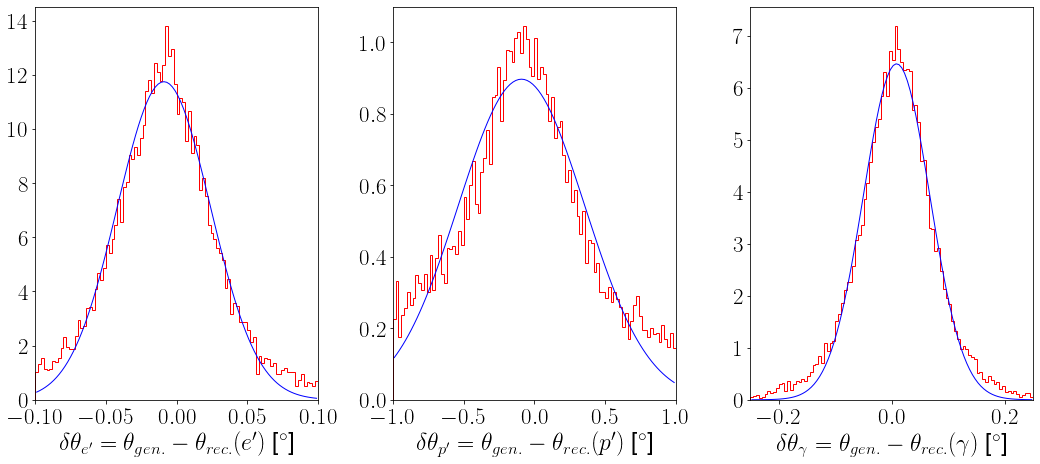

In [142]:
#angle resolution
fig, axs = plt.subplots(1,3, figsize=(15, 7))
cmap = copy(plt.cm.get_cmap("jet"))
#gen. - rec.
axs[0].hist((dvcsFDFD["MCEtheta"]-dvcsFDFD["Etheta"]), bins = np.linspace(-0.1, 0.1, 101), density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
axs[0].plot(binscenters_e, gauss(binscenters_e,*popt_e), color='b', linewidth=1.0, label=r'Fitted function')
axs[0].set_xlabel(r"$\delta \theta_{e'}=\theta_{gen.}-\theta_{rec.} (e')$"+" ["+r"${}^{\circ}$"+"]")
axs[0].set_xlim([-0.1, 0.1])
axs[1].hist((dvcsFDFD["MCPtheta"]-dvcsFDFD["Ptheta"]), bins = np.linspace(-1, 1, 101), density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
axs[1].plot(binscenters_p, gauss(binscenters_p,*popt_p), color='b', linewidth=1.0, label=r'Fitted function')
axs[1].set_xlabel(r"$\delta \theta_{p'}=\theta_{gen.}-\theta_{rec.} (p')$"+" ["+r"${}^{\circ}$"+"]")
axs[1].set_xlim([-1, 1])
axs[2].hist((dvcsFDFD["MCGtheta"]-dvcsFDFD["Gtheta"]), bins = np.linspace(-0.25, 0.25, 101), density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
axs[2].plot(binscenters_g, gauss(binscenters_g,*popt_g), color='b', linewidth=1.0, label=r'Fitted function')
axs[2].set_xlabel(r"$\delta \theta_{\gamma}=\theta_{gen.}-\theta_{rec.} (\gamma)$"+" ["+r"${}^{\circ}$"+"]")
axs[2].set_xlim([-0.25, 0.25])

# ax.hist((dvcsCD["MCEe"]+dvcsCD["MCPe"]+dvcsCD["MCGe"]-dvcsCD["Ee"]-dvcsCD["Pe"]-dvcsCD["Ge"]), bins = 101, density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
# ax.hist((dvcsFD["MCEe"]+dvcsFD["MCPe"]+dvcsFD["MCGe"]-dvcsFD["Ee"]-dvcsFD["Pe"]-dvcsFD["Ge"]), bins = 101, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
plt.tight_layout()
# plt.show()
plt.savefig("theta_resolution.pdf")

In [159]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))

In [192]:
binedges = np.linspace(-0.1, 0.1, 101)
data_entries, bins = np.histogram(dvcsFDFD["MCEtheta"]-dvcsFDFD["Etheta"], bins=binedges, density=True)
binscenters = np.array([0.5 * (bins[i] + bins[i + 1])
                        for i in range(len(bins) - 1)])
popt, pcov = curve_fit(
    gauss, xdata=binscenters, ydata=data_entries, p0=[
        1, 0, 0.05])

In [178]:
popt_e = popt
binscenters_e = binscenters
chi2_e = (gauss(binscenters_e,*popt_e)-data_entries)**2/data_entries
chi2_e = chi2_e.sum()
print(popt[1:],chi2_e)

[-0.00897971 -0.03297165] 15.54492445187294


In [179]:
binedges =  np.linspace(-1, 1, 101)
data_entries, bins = np.histogram((dvcsFDFD["MCPtheta"]-dvcsFDFD["Ptheta"]), bins=binedges, density=True)
binscenters = np.array([0.5 * (bins[i] + bins[i + 1])
                        for i in range(len(bins) - 1)])
popt, pcov = curve_fit(
    gauss, xdata=binscenters, ydata=data_entries, p0=[
        1, 0, 0.05])

In [180]:
popt_p = popt
binscenters_p = binscenters
chi2_p = (gauss(binscenters_p,*popt_p)-data_entries)**2/data_entries
chi2_p = chi2_p.sum()
print(popt[1:],chi2_p)

[-0.09007712  0.44682037] 1.9555253447181797


In [181]:
binedges = np.linspace(-0.25, 0.25, 101)
data_entries, bins = np.histogram((dvcsFDFD["MCGtheta"]-dvcsFDFD["Gtheta"]), bins=binedges, density=True)
binscenters = np.array([0.5 * (bins[i] + bins[i + 1])
                        for i in range(len(bins) - 1)])
popt, pcov = curve_fit(
    gauss, xdata=binscenters, ydata=data_entries, p0=[
        1, 0, 0.05])

In [182]:
popt_g = popt
binscenters_g = binscenters
chi2_g = (gauss(binscenters_g,*popt_g)-data_entries)**2/data_entries
chi2_g = chi2_g.sum()
print(popt[1:],chi2_g)

[0.00843947 0.05887523] 7.904678379685543


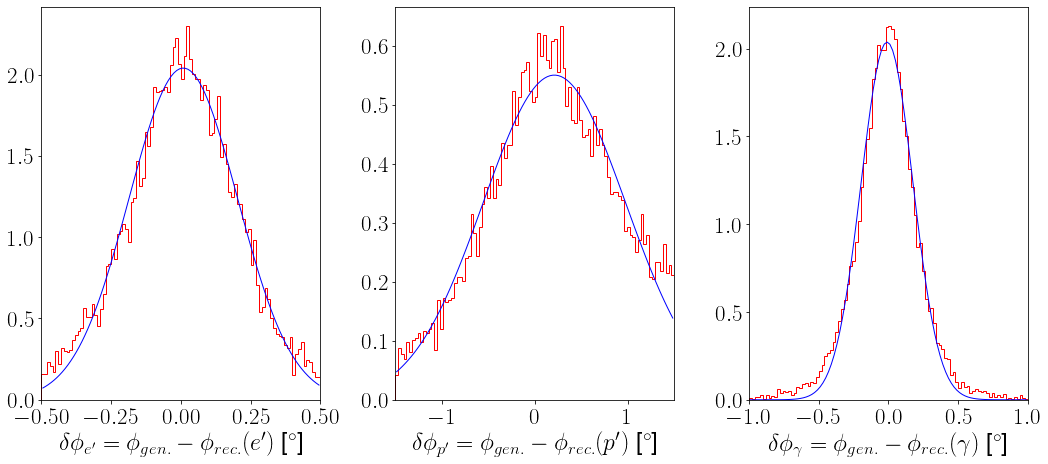

In [228]:
#angle resolution
fig, axs = plt.subplots(1,3, figsize=(15, 7))
cmap = copy(plt.cm.get_cmap("jet"))
#gen. - rec.
axs[0].hist((dvcsFDFD["MCEphi"]-dvcsFDFD["Ephi"]), bins = np.linspace(-0.5, 0.5, 101), density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
axs[0].plot(binscenters_e, gauss(binscenters_e,*popt_e), color='b', linewidth=1.0, label=r'Fitted function')
axs[0].set_xlabel(r"$\delta \phi_{e'}=\phi_{gen.}-\phi_{rec.} (e')$"+" ["+r"${}^{\circ}$"+"]")
axs[0].set_xlim([-0.5, 0.5])
axs[1].hist((dvcsFDFD["MCPphi"]-dvcsFDFD["Pphi"]), bins = np.linspace(-1.5, 1.5, 101), density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
axs[1].plot(binscenters_p, gauss(binscenters_p,*popt_p), color='b', linewidth=1.0, label=r'Fitted function')
axs[1].set_xlabel(r"$\delta \phi_{p'}=\phi_{gen.}-\phi_{rec.} (p')$"+" ["+r"${}^{\circ}$"+"]")
axs[1].set_xlim([-1.5, 1.5])
axs[2].hist((dvcsFDFD["MCGphi"]-dvcsFDFD["Gphi"]), bins = np.linspace(-1, 1, 101), density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
axs[2].plot(binscenters_g, gauss(binscenters_g,*popt_g), color='b', linewidth=1.0, label=r'Fitted function')
axs[2].set_xlabel(r"$\delta \phi_{\gamma}=\phi_{gen.}-\phi_{rec.} (\gamma)$"+" ["+r"${}^{\circ}$"+"]")
axs[2].set_xlim([-1, 1])

plt.tight_layout()
# plt.show()
plt.savefig("phi_resolution.pdf")

In [225]:
binedges = np.linspace(-0.5, 0.5, 101)
data_entries, bins = np.histogram(dvcsFDFD["MCEphi"]-dvcsFDFD["Ephi"], bins=binedges, density=True)
binscenters = np.array([0.5 * (bins[i] + bins[i + 1])
                        for i in range(len(bins) - 1)])
popt, pcov = curve_fit(
    gauss, xdata=binscenters, ydata=data_entries, p0=[
        1, 0, 0.05])
popt_e = popt
binscenters_e = binscenters
chi2_e = (gauss(binscenters_e,*popt_e)-data_entries)**2/data_entries
chi2_e = chi2_e.sum()
print(popt[1:],chi2_e)

[0.0085993  0.19485704] 1.6260192795758495


In [226]:
binedges =  np.linspace(-1.5, 1.5, 101)
data_entries, bins = np.histogram((dvcsFDFD["MCPphi"]-dvcsFDFD["Pphi"]), bins=binedges, density=True)
binscenters = np.array([0.5 * (bins[i] + bins[i + 1])
                        for i in range(len(bins) - 1)])
popt, pcov = curve_fit(
    gauss, xdata=binscenters, ydata=data_entries, p0=[
        1, 0, 0.05])
popt_p = popt
binscenters_p = binscenters
chi2_p = (gauss(binscenters_p,*popt_p)-data_entries)**2/data_entries
chi2_p = chi2_p.sum()
print(popt[1:],chi2_p)

[0.21161614 0.7666722 ] 0.47123095085875977


In [227]:
binedges =  np.linspace(-1, 1, 101)
data_entries, bins = np.histogram((dvcsFDFD["MCGphi"]-dvcsFDFD["Gphi"]), bins=binedges, density=True)
binscenters = np.array([0.5 * (bins[i] + bins[i + 1])
                        for i in range(len(bins) - 1)])
popt, pcov = curve_fit(
    gauss, xdata=binscenters, ydata=data_entries, p0=[
        1, 0, 0.05])
popt_g = popt
binscenters_g = binscenters
chi2_g = (gauss(binscenters_g,*popt_g)-data_entries)**2/data_entries
chi2_g = chi2_g.sum()
print(popt[1:],chi2_g)

[-0.01041534  0.18602589] 2.1291239226664405
